# Estatística descritiva univariada

## Tabela de distribuição de frequências e representações gráficas

As tabelas de distribuições de frequência podem ser utilizadas para representar a frequência de ocorrências de um conjunto de observações de variáveis qualitativas ou quantitativas.

No caso de variáveis qualitativas, a tabela representa a frequência de ocorrências de cada categoria da variável. Para as variáveis quantitativas discretas, a frequência de ocorrências é calculada para cada valor discreto da variável. Já os dados das variáveis contínuas são agrupados inicialmente em classes, e a partir daí são calculadas as
frequências de ocorrências para cada classe.

Uma tabela de distribuição de frequências usualmente comporta os seguintes cálculos:

- Frequência absoluta (*F<sub>i</sub>*): número de ocorrências de cada elemento *i* na amostra.
- Frequência relativa (*Fr<sub>i</sub>*): porcentagem relativa à frequência absoluta.
- Frequência acumulada (*F<sub>ac</sub>*): soma de todas as ocorrências até o elemento analisado.
- Frequência relativa acumulada (*Fr<sub>ac</sub>*}: porcentagem relativa à frequência acumulada (soma de todas as frequências relativas até o elemento analisado).

#### Exemplo 1

Um determinado hospital precisa de ao menos 60 doações de sangue por dia para manter seu estoque para transfusões. A seguinte base de dados apresenta o tipo sanguíneo para os doadores de um determinado dia. Utilizaremos tal base para construir uma tabela de distribuição de frequências.

In [2]:
import pandas as pd

In [3]:

DADOS = "../base_de_dados/blood_donors.csv"

df = pd.read_csv(DADOS)

df.head()

,donor_id,blood_type
0,1,a+
1,2,a+
2,3,a+
3,4,a+
4,5,a+


In [4]:
#checando as 5 ultimas do df
df.tail()

,donor_id,blood_type
55,56,o+
56,57,o+
57,58,o+
58,59,o-
59,60,o-


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   donor_id    60 non-null     int64 
 1   blood_type  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


gerando estatísticas descritivas apenas para colunas não numéricas 

In [6]:
#checando coluna blood_type
df.describe(exclude='number')

,blood_type
count,60
unique,8
top,o+
freq,32


contando a **frequência de cada valor único** na coluna `"blood_type - do maior para o menor"

In [7]:
df['blood_type'].value_counts()

blood_type
o+     32
a+     15
b+      6
a-      2
o-      2
b-      1
ab-     1
ab+     1
Name: count, dtype: int64

Ordenando tipos sanguineos


In [8]:
df['blood_type'].value_counts().sort_index()

blood_type
a+     15
a-      2
ab+     1
ab-     1
b+      6
b-      1
o+     32
o-      2
Name: count, dtype: int64

analisando a distribuição de uma variável categórica (`blood_type`).
## **📌 Resumo**
Esse código gera uma **tabela de frequências** para a variável `"blood_type"` com as seguintes informações:  
1️⃣ **Frequência absoluta**: Quantas vezes cada tipo sanguíneo aparece.  
2️⃣ **Frequência relativa**: A porcentagem de cada tipo no total.  
3️⃣ **Frequência acumulada**: A soma progressiva da frequência absoluta.  
4️⃣ **Frequência relativa acumulada**: A soma progressiva da frequência relativa (sempre termina em `1.0` ou `100%`).  


In [9]:
#inicializando um DataFrame vazio que será preenchido com as análises.
df_analise_estatistica= pd.DataFrame()

#criando colunas para analise de frequencias
#Criando a coluna de frequência absoluta**
# value_counts()→ Conta quantas vezes cada tipo sanguíneo aparece.  
#.sort_index()` → Organiza os tipos sanguíneos em **ordem alfabética** para facilitar a leitura.
df_analise_estatistica['frequencia'] =  df['blood_type'].value_counts().sort_index()

#frequencia relativa(percentual) -  transformar em porcentagem  -> value_counts(normalize=True)
#- Exemplo: Se `"A+"` aparece 3 vezes em um total de 6 registros, a frequência relativa será `3/6 = 0.5` (ou 50%).  

df_analise_estatistica['frequencia_relativa'] = df['blood_type'].value_counts(normalize=True).sort_index()

#frequencia acumulada -Ele soma cada valor com o anterior, ajudando a visualizar **quantos valores já foram contados até aquele ponto

df_analise_estatistica['frequencia_acumulada'] = df_analise_estatistica['frequencia'].cumsum()

#- `cumsum()` acumula os valores da **frequência relativa**.  
#- Isso mostra **a porcentagem acumulada** dos valores já contados.  

df_analise_estatistica['frequencia_relativa_acumulada'] = df_analise_estatistica['frequencia_relativa'].cumsum()

df_analise_estatistica

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
blood_type,,,,
a+,15,0.250000,15,0.250000
a-,2,0.033333,17,0.283333
ab+,1,0.016667,18,0.300000
ab-,1,0.016667,19,0.316667
b+,6,0.100000,25,0.416667
b-,1,0.016667,26,0.433333
o+,32,0.533333,58,0.966667
o-,2,0.033333,60,1.000000


In [10]:
from funcoes_auxiliares import tabela_distribuicao_frequencias
#atribuindo a função
df_tabela_dist_freq = tabela_distribuicao_frequencias(df, "blood_type")
df_tabela_dist_freq

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
blood_type,,,,
a+,15,0.250000,15,0.250000
a-,2,0.033333,17,0.283333
ab+,1,0.016667,18,0.300000
ab-,1,0.016667,19,0.316667
b+,6,0.100000,25,0.416667
b-,1,0.016667,26,0.433333
o+,32,0.533333,58,0.966667
o-,2,0.033333,60,1.000000


Tabela de visualização de frequencia
- Criando gráfico simples


<Axes: xlabel='blood_type', ylabel='count'>

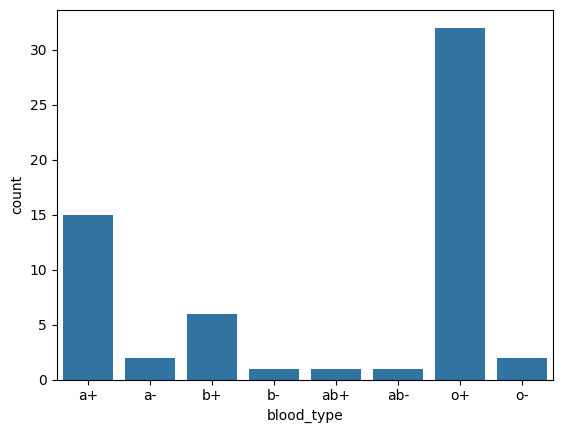

In [11]:
#visualização de dados 
import seaborn as sns

sns.countplot(data=df, x="blood_type")

- Criando gráfico com 2 eixos comparando dados frequencia e frequencia acumulada

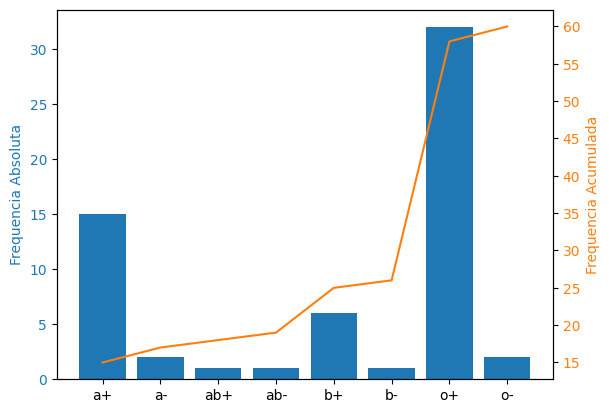

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#criando figura e distribuição de eixo
#eixo x
fig, ax = plt.subplots()
#twin - utilizando o meso eixo x 
ax2 = ax.twinx()
#criando grafico de barras para eixo x 
ax.bar(df_tabela_dist_freq.index, df_tabela_dist_freq["frequencia"], color="C0")

#criando grafico de linha para ax2
ax2.plot(df_tabela_dist_freq.index, df_tabela_dist_freq["frequencia_acumulada"],color="C1")

#adicionando lables 
ax.set_ylabel("Frequencia Absoluta",color="C0")
ax2.set_ylabel("Frequencia Acumulada",color="C1")
#mudando a cor dos traços que representam a frquencia 
ax.tick_params(axis="y", labelcolor="C0")
ax2.tick_params(axis="y", labelcolor="C1")

#mudando a localização dos traços de 10 em 10 para 5 em 5
ax2.yaxis.set_major_locator(mtick.MultipleLocator(base=5.0))

plt.show()

- Criando gráfico com 2 eixos comparando dados frequencia e frequencia relativa acumulada

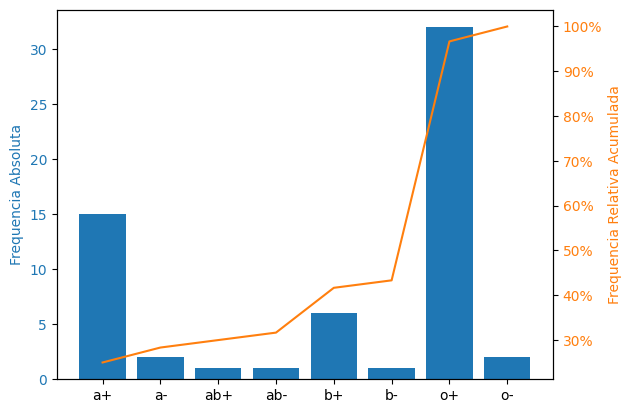

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#criando figura e distribuição de eixo
#eixo x
fig, ax = plt.subplots()
#twin - utilizando o meso eixo x 
ax2 = ax.twinx()
#criando grafico de barras para eixo x 
ax.bar(df_tabela_dist_freq.index, df_tabela_dist_freq["frequencia"], color="C0")

#criando grafico de linha para ax2
ax2.plot(df_tabela_dist_freq.index, df_tabela_dist_freq["frequencia_relativa_acumulada"],color="C1")

#adicionando lables 
ax.set_ylabel("Frequencia Absoluta",color="C0")
ax2.set_ylabel("Frequencia Relativa Acumulada",color="C1")
#mudando a cor dos traços que representam a frquencia 
ax.tick_params(axis="y", labelcolor="C0")
ax2.tick_params(axis="y", labelcolor="C1")

#Formatando em porcentagem - dividindo pelo maior valor = 1
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()